In [1]:
#20180409 數字辨識
from sklearn import datasets,cluster,metrics
digits=datasets.load_digits() #使用數字資料庫
print(digits["DESCR"])
print(digits["data"])
print(digits["target"])


Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [4]:
from sklearn import datasets,cluster,metrics
digits=datasets.load_digits()
digits_data=digits.data
digitals_fit=cluster.KMeans(n_clusters=10).fit(digits_data) #使用KMeans 做預測
silhouette_avg=metrics.silhouette_score(digits_data,digitals_fit.labels_)
print(silhouette_avg)

0.18242458807494524


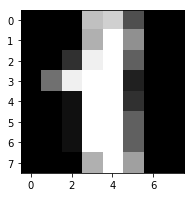

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt
digits=datasets.load_digits()
plt.figure(1,figsize=(3,3))
plt.imshow(digits.images[1],cmap=plt.cm.gray,interpolation='nearest')
#plt.imshow(digits.images[0],cmap=plt.cm.gray_r,interpolation='nearest')
                                        #gray + _r是白底的，不加r是黑底的
plt.show()

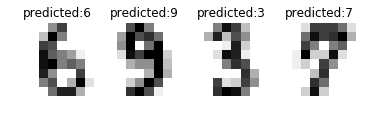

In [7]:
from sklearn import datasets,cluster,metrics
from sklearn import svm
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
digits=datasets.load_digits()
#X為資料，Y為分類結果，images為影像檔，三者都要分成train(訓練資料)與test(測試資料)
#75%=0.75為訓練資料，25%=0.25為測試資料random_state為亂數起值
X_train,X_test,Y_train,Y_test,images_train,images_test=train_test_split(digits.data,digits.target,digits.images,test_size=0.25,random_state=42)
svc_model =svm.SVC(gamma=0.001,C=100.,kernel='linear')
svc_model.fit(X_train,Y_train)
predicted = svc_model.predict(X_test)
#以下為畫圖
images_and_predictions =list(zip(images_test,predicted))
for index, (image,prediction) in enumerate (images_and_predictions[:4]):
    plt.subplot(1,4,index+1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.binary)
    plt.title('predicted:' + str(prediction))
plt.show()